In [81]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [82]:
df = pd.read_csv('myit.csv', index_col='DATE', parse_dates=True) # historical average temperature of Myitkyina,
# Myanmar downloaded from NOAA

df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [83]:
datatest=df.reset_index()

In [84]:
datatest.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


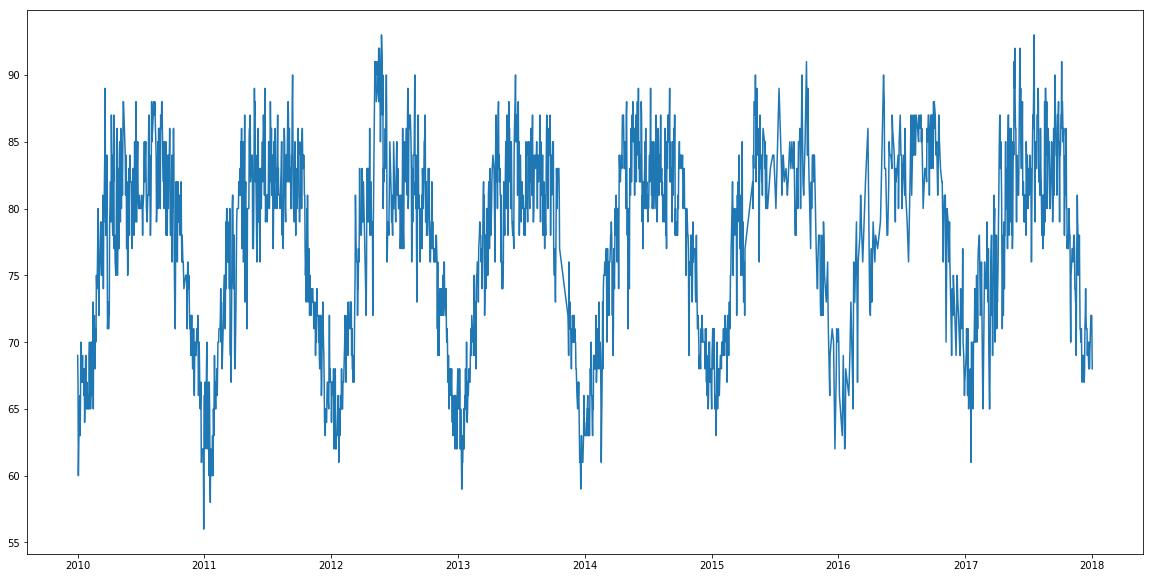

In [85]:
plt.plot(datatest['DATE'], datatest['TAVG'])
plt.show()

In [63]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'})


In [64]:
datatest.head()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


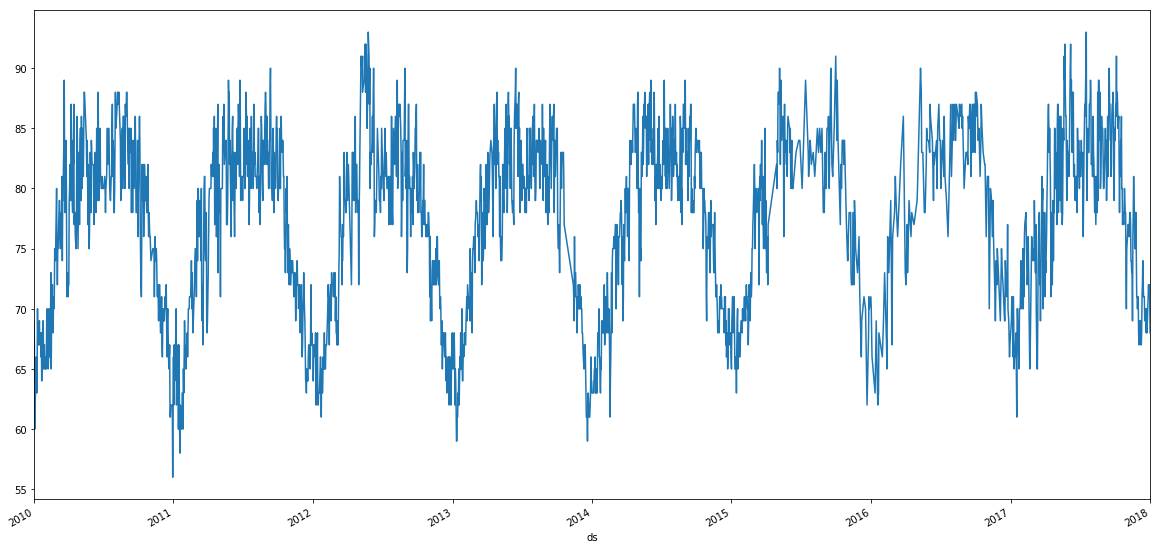

In [65]:
datatest.set_index('ds').y.plot()

In [6]:
datatest.head()


,DATE,TAVG
0,2010-01-01,69
1,2010-01-02,67
2,2010-01-03,60
3,2010-01-04,62
4,2010-01-06,65


In [67]:
datatest=datatest.replace(0,np.NaN)

In [68]:
datatest.reset_index()

,index,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"
5,5,2010-01-07,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,66,"H,,S",85.0,",,S",48.0,",,S"
6,6,2010-01-08,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",NaN,NaN,48.0,",,S"
7,7,2010-01-09,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,47.0,",,S"
8,8,2010-01-10,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,70,"H,,S",83.0,",,S",NaN,NaN
9,9,2010-01-11,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",82.0,",,S",50.0,",,S"


In [69]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'})


In [70]:
datatest.head()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [13]:
#datatest=datatest.head(1500)


In [71]:
from fbprophet import Prophet

model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)

In [72]:
model.fit(datatest)

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [73]:
future = model.make_future_dataframe(periods=1000, freq = 'd')
future.tail()

,ds
3335,2020-09-23
3336,2020-09-24
3337,2020-09-25
3338,2020-09-26
3339,2020-09-27


In [74]:
forecast = model.predict(future)


In [34]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2359,2018-01-21,4.267825,4.267825,4.267825,4.151285,4.257273,-0.065996,-0.065996,-0.065996,0.092438,...,0.0,0.0,0.0,0.001791,0.001791,0.001791,-0.160225,-0.160225,-0.160225,4.201829
2360,2018-01-22,4.267827,4.267827,4.267827,4.149714,4.251753,-0.067854,-0.067854,-0.067854,0.092438,...,0.0,0.0,0.0,-0.002395,-0.002395,-0.002395,-0.157896,-0.157896,-0.157896,4.199973
2361,2018-01-23,4.267828,4.267828,4.267828,4.151024,4.256961,-0.063772,-0.063772,-0.063772,0.092438,...,0.0,0.0,0.0,-0.000838,-0.000838,-0.000838,-0.155371,-0.155371,-0.155371,4.204056
2362,2018-01-24,4.267829,4.267829,4.267829,4.152078,4.258377,-0.060963,-0.060963,-0.060963,0.092438,...,0.0,0.0,0.0,-0.000723,-0.000723,-0.000723,-0.152678,-0.152678,-0.152678,4.206866
2363,2018-01-25,4.267831,4.267831,4.267831,4.154704,4.263160,-0.056858,-0.056858,-0.056858,0.092438,...,0.0,0.0,0.0,0.000550,0.000550,0.000550,-0.149845,-0.149845,-0.149845,4.210973


In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
3330,2020-09-18,4.430286,4.344207,4.512945
3331,2020-09-19,4.429216,4.339152,4.522101
3332,2020-09-20,4.430384,4.345668,4.513831
3333,2020-09-21,4.426102,4.337009,4.516449
3334,2020-09-22,4.427665,4.335031,4.517668
3335,2020-09-23,4.427886,4.341406,4.518310
3336,2020-09-24,4.429353,4.344533,4.518577
3337,2020-09-25,4.430265,4.348283,4.519042
3338,2020-09-26,4.429823,4.344419,4.520815
3339,2020-09-27,4.431554,4.342655,4.518618


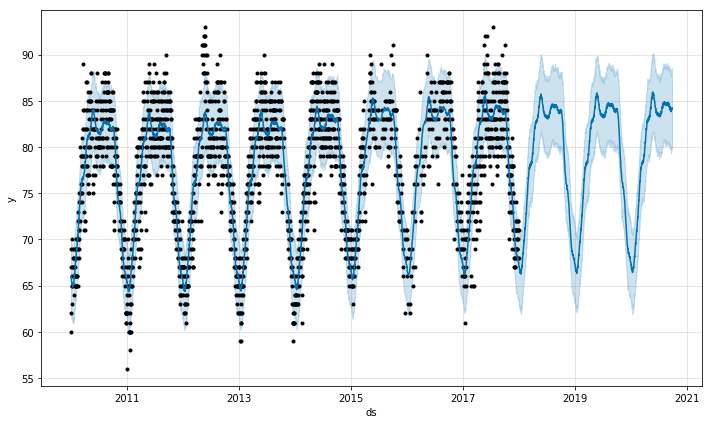

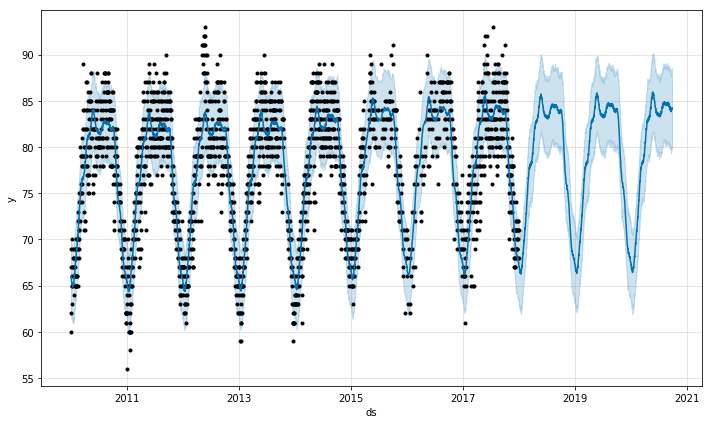

In [75]:
model.plot(forecast)


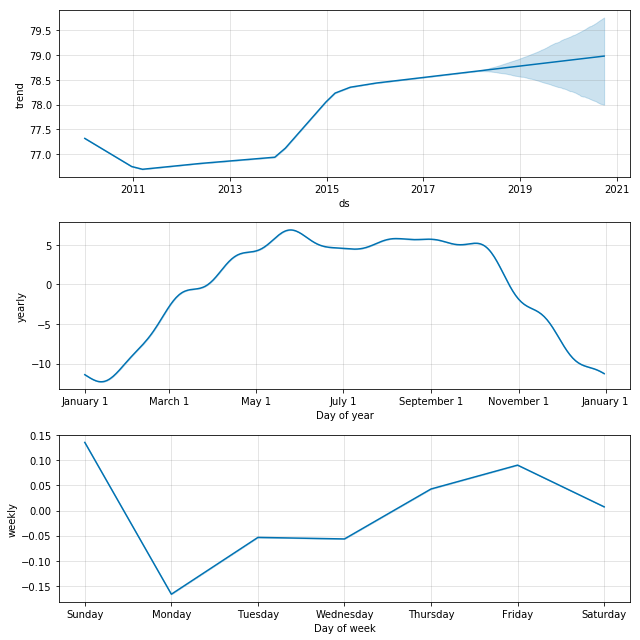

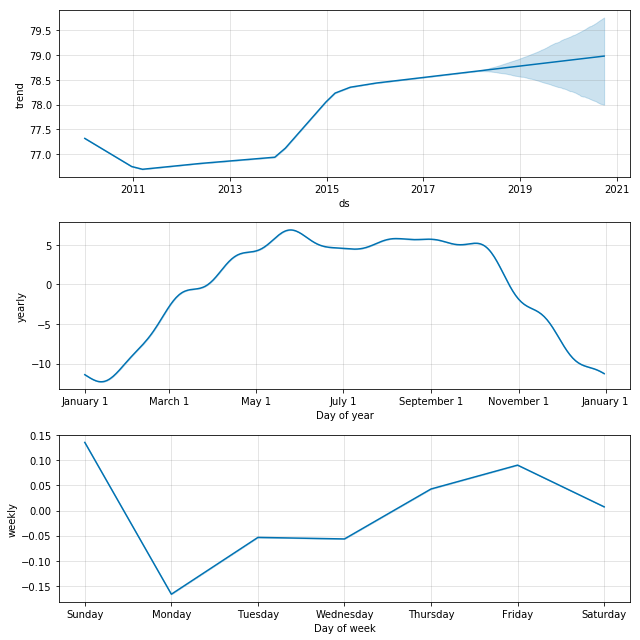

In [76]:
model.plot_components(forecast)